In [1]:
df<-read.csv("../movies/temp_mining_prever2.csv",fileEncoding = 'utf-8',stringsAsFactors = F)
actor_scroe_df <- read.csv("../movies/ju_score.csv" ,fileEncoding = 'utf-8',stringsAsFactors = F)

In [4]:
head(df,2)

누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,주연,제작사,cluster,조연,감독_주연조연시너지수,감독_주연조연악연수,상영횟수당누적관객수,스크린점유율,배우누적점수,배우점수,배우수
7232387,1299,138226,2017-12-27,CJ ENM,15세이상관람가,드라마,장준환,"김윤석,하정우,유해진,김태리,박희순,이희준",(주)우정필름,4,"유승목,현봉식,박지환,이용직,박지홍,김경덕,김의성,최광일,김수진,김종수,김혜정,조우진,임철형,이창훈,서현우,이현균,김승훈,박경혜,이화룡",6,0,52.32291,46.96312,62.17949,16,6
2535450,340,54566,2007-02-14,CJ ENM,15세이상관람가,"드라마,코미디",윤제균,"임창정,하지원",(주)두사부필름,1,"주현,정두홍,이훈,강예원,박창익,박유선,고태호",0,0,46.46575,17.21519,8.00000,7,2


In [15]:
head(actor_scroe_df,1)

주연,총횟수,cluster,횟수,누적관객수__개봉일스크린수,누적관객수__스크린수,누적관객수__상영횟수,평균_관람객_개스크,평균_관람객_스크,평균_관람객_상횟,관람객개스크점수
강동원,17,1,1,13949.42,10547.12,101.5337,13949.42,10547.12,101.5337,13949.42


In [10]:
df$배우점수개스크 <- 0
df$배우점수개스크ver2 <- 0

In [11]:
for(i in 1:nrow(df)){
    a <- unlist(strsplit(df$주연[i],","))
    x<-c()
    y<-c()
    for(j in 1:nrow(actor_scroe_df)){
        if( actor_scroe_df$주연[j] %in% a ){
            
            x<- c(x,actor_scroe_df$평균_관람객_개스크[j])
            y<- c(y,actor_scroe_df$관람객개스크점수[j])
        }
        
    }
    if(length(x)>=1){
        
    df$배우점수개스크[i] = max(x)
    df$배우점수개스크ver2[i] = max(y)
    }
        
}


In [19]:
df[df$배우점수개스크==0,"배우점수개스크"] = 10477.0861787964

In [21]:
df[df$관람객개스크점수 ==0,"관람객개스크점수"] ==20007.4599843946

logical(0)

[1] 10827.99

[1] 20007.46

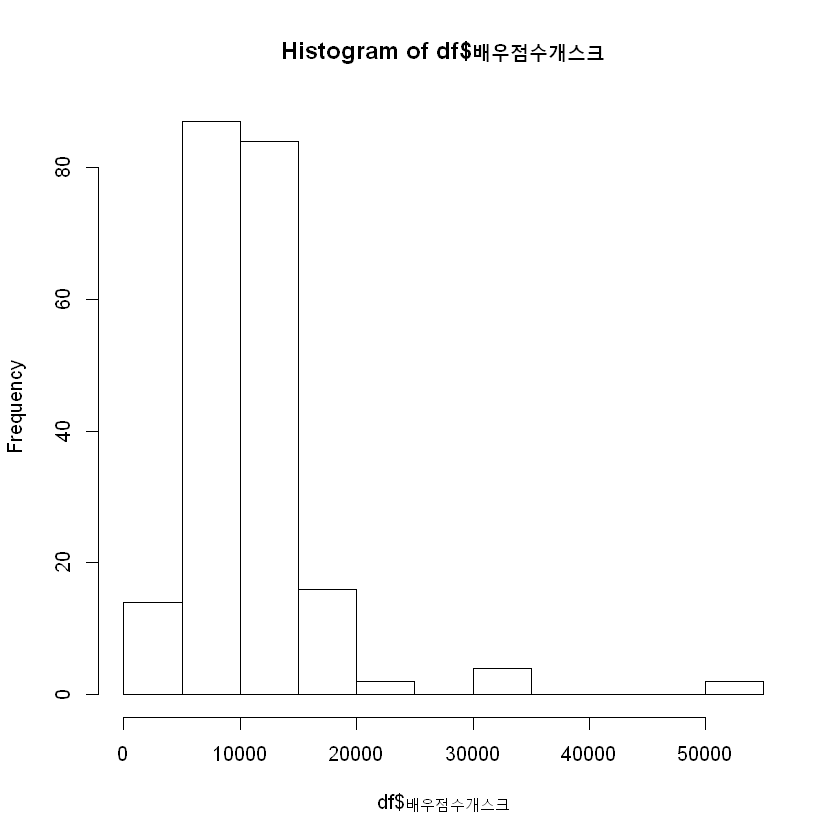

In [20]:
hist(df$배우점수개스크)
mean(df$배우점수개스크)
mean(df$배우점수개스크ver2)

In [22]:
write.csv(df,"../movies/temp_mining_ver3.csv",row.names = F, fileEncoding = "utf-8")